<a href="https://colab.research.google.com/github/ayandahuate/Data-Science-Internship/blob/main/EDA_Athletics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# find file path from directory window on the left pane of this file)
file_path = "/content/drive/MyDrive/Data Science Internship/Athletics cohort 2013-2017/Athletics20132017.xlsx"

# read csv into Pandas data from
df = pd.read_excel(file_path)

# show first 5 rows
df.head()

Mounted at /content/drive


,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport
0,290363,M,"White, Non-Hispanic",1995-05-12,Sports Management,BUS,2.64,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN
1,446698,F,"White, Non-Hispanic",1995-07-17,Biochemistry Major,BIO,3.18,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Tennis--Women
2,446761,M,"White, Non-Hispanic",1995-04-15,Education Curriculum Studies,EDU,2.86,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN
3,447029,M,Asian or Pacific Islander,1995-04-23,Undecided,Undecided,2.71,FALL 2013 FTFT,F,NaT,O,2014-05-08,Y,Soccer--Men
4,447033,M,"White, Non-Hispanic",1994-07-22,Biochemistry Major,BIO,3.94,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN


In [ ]:
df.columns

Index(['ID_NUM', 'GENDER', 'ETHINCITY_RACE_DESCRIPTION', 'DOB',
       'MAJOR_MINOR_DESC', 'DEPARTMENT', 'CAREER_GPA', 'COHORT',
       'CANDIDACY_TYPE', 'DTE_DEGR_CONFERRED', 'EXIT_REASON', 'EXIT_DATE',
       'athlete', 'athleteSport'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_NUM                      1314 non-null   int64         
 1   GENDER                      1314 non-null   object        
 2   ETHINCITY_RACE_DESCRIPTION  1314 non-null   object        
 3   DOB                         1314 non-null   datetime64[ns]
 4   MAJOR_MINOR_DESC            1314 non-null   object        
 5   DEPARTMENT                  1314 non-null   object        
 6   CAREER_GPA                  1314 non-null   float64       
 7   COHORT                      1314 non-null   object        
 8   CANDIDACY_TYPE              1314 non-null   object        
 9   DTE_DEGR_CONFERRED          775 non-null    datetime64[ns]
 10  EXIT_REASON                 1271 non-null   object        
 11  EXIT_DATE                   1271 non-null   datetime64[n

In [ ]:
#creating neww column 'COHORT_DATE' based on column "COHORT'

#Function to extract the year and semester from COHORT
def extract_cohort_date(cohort):
    parts = cohort.split()
    year = int(parts[1])
    semester = parts[0]

    if semester == 'FALL':
        return pd.to_datetime(f'09/01/{year}')

# Create a new column 'COHORT_DATE' using the function
df['COHORT_DATE'] = df['COHORT'].apply(extract_cohort_date)

# Display the transformed DataFrame
print(df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [ ]:
# Calculate age

#.astype to convert days to integer years
df['AGE'] = (df['COHORT_DATE'] - df['DOB']).astype('<m8[Y]')

# df with new column age
print(df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [ ]:
#getting counts for each category

# counts for 'GENDER'
gender_counts = df['GENDER'].value_counts()
print("Counts of GENDER:")
print(gender_counts)

# counts for 'ETHNICITY_RACE_DESCRIPTION'
ethnicity_counts = df['ETHINCITY_RACE_DESCRIPTION'].value_counts()
print("\nCounts of ETHNICITY_RACE_DESCRIPTION:")
print(ethnicity_counts)


# counts for ' CANDIDACY_TYPE '

candidacy_counts = df ['CANDIDACY_TYPE'].value_counts()
print("\nCounts of CANDIDACY TYPE:")
print(candidacy_counts)

# counts for 'ETHNICITY_RACE_DESCRIPTION'
ethnicity_counts = df['ETHINCITY_RACE_DESCRIPTION'].value_counts()
print("\nCounts of ETHNICITY_RACE_DESCRIPTION:")
print(ethnicity_counts)


# counts for athletes and non athletes
athlete_counts = df['athlete'].value_counts()
print("\n Counts of athletes and non athletes ")
print(athlete_counts)

# counts for 'athleteSport'
sport_counts = df['athleteSport'].value_counts()
print("\nCounts of Sports:")
print(sport_counts)


# counts for 'DEPARTMENT'
department_counts = df['DEPARTMENT'].value_counts()
print("\nCounts of DEPARTMENT:")
print(department_counts)

# counts for 'AGE'
age_counts = df['AGE'].value_counts()
print("\nCounts of AGE:")
print(age_counts)


#counts for 'COHORT'
cohort_counts = df['COHORT'].value_counts()
print("\nCounts of COHORT:")
print(cohort_counts)

Counts of GENDER:
M    732
F    582
Name: GENDER, dtype: int64

Counts of ETHNICITY_RACE_DESCRIPTION:
White, Non-Hispanic                  711
White                                227
Nonresident Alien                    138
African-American, Non-Hispanic        86
Hispanic                              40
Black or African American             21
American Indian or Alaskan Native     18
Other                                 16
Asian or Pacific Islander             12
Hispanics of any race                 11
Two or more races                      9
Race/Ethnicity Unknown                 7
Race and Ethnicity unknown             7
Unknown                                6
American Indian or Alaska Native       3
Asian                                  2
Name: ETHINCITY_RACE_DESCRIPTION, dtype: int64

Counts of CANDIDACY TYPE:
F    954
T    179
I    127
1     38
Z      9
2      7
Name: CANDIDACY_TYPE, dtype: int64

Counts of ETHNICITY_RACE_DESCRIPTION:
White, Non-Hispanic                  711

In [ ]:
df.describe()

,ID_NUM,CAREER_GPA,AGE
count,1.314000e+03,1314.000000,1314.000000
mean,1.041125e+06,2.916956,18.770167
std,5.924440e+05,0.917314,1.860437
min,2.903630e+05,0.000000,13.000000
25%,4.682375e+05,2.480000,18.000000
50%,4.796040e+05,3.150000,18.000000
75%,1.656001e+06,3.630000,19.000000
max,1.723337e+06,4.000000,51.000000


In [ ]:
# Summary of categorical variables  (object = categorical data)
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

       GENDER ETHINCITY_RACE_DESCRIPTION MAJOR_MINOR_DESC DEPARTMENT  \
count    1314                       1314             1314       1314   
unique      2                         16               94         16   
top         M        White, Non-Hispanic        Undecided  Undecided   
freq      732                        711              345        345   

                COHORT CANDIDACY_TYPE EXIT_REASON athlete athleteSport  
count             1314           1314        1271    1314          699  
unique              10              6           6       2           19  
top     FALL 2013 FTFT              F           G       Y     Football  
freq               259            954         757     699          155  


In [ ]:
#Summary of  dates
summary = df.describe(include=['datetime'])
print(summary)

                        DOB   DTE_DEGR_CONFERRED            EXIT_DATE  \
count                  1314                  775                 1271   
unique                  988                   26                  109   
top     1997-08-17 00:00:00  2017-05-13 00:00:00  2017-05-13 00:00:00   
freq                      5                  135                  138   
first   1963-03-27 00:00:00  2014-08-31 00:00:00  2013-08-26 00:00:00   
last    2004-05-25 00:00:00  2023-05-13 00:00:00  2023-08-03 00:00:00   

                COHORT_DATE  
count                  1314  
unique                    5  
top     2013-09-01 00:00:00  
freq                    304  
first   2013-09-01 00:00:00  
last    2017-09-01 00:00:00  


<ipython-input-11-680b494b68d9>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = df.describe(include=['datetime'])
<ipython-input-11-680b494b68d9>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = df.describe(include=['datetime'])
<ipython-input-11-680b494b68d9>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = df.describe(include=['datetime'])
<ipython-input-1

In [ ]:
Categories_Majors = pd.unique(df['MAJOR_MINOR_DESC'])
print(Categories_Majors)

['Sports Management' 'Biochemistry Major' 'Education Curriculum Studies'
 'Undecided' 'Biology Major' 'International Business Major'
 'Psychology Major' 'English Major' 'Secondary Education Major'
 'Security Studies Major' 'Elementary Education Major'
 'Economics with Honors Major' 'Political Science Major (General)'
 'Mathematical Sciences Major' 'Environmental Studies Major'
 'Environmental Sciences Major' 'Finance Major'
 'Early Childhood Education Major' 'Computer Science Major'
 'Business Administration Major' 'Business Communication' 'History Major'
 'Religious Studies Major' 'English Major with Creative Writing Track'
 'Economics Major' 'Sociology and Anthropology Major'
 'Self-Designed-Actuary Science' 'Chemistry Major'
 'Information Technology' 'Philosophy Major' 'Transnational Studies'
 'Exercise Science' 'Accounting Major' 'Physics Major'
 'Middle School  Education Major'
 'Self-Designed-Criminal Justice, Law and Security' 'Spanish Major'
 'Computer Science / Algorithms & Pr

In [ ]:
Categories_Candidacy= pd.unique(df['CANDIDACY_TYPE'])
print(Categories_Candidacy)

# F - freshmen
# 1- Conditionally admitted(freshman)
#I-Internatioinal


#T-transfer
#2- Conditionally admitted(transfer)
#Z - International Transfer

['F' 1 'I' 'T' 'Z' 2]


In [ ]:
Categories_Exit = pd.unique(df['EXIT_REASON'])
print(Categories_Exit)


#G and S - graduate / summer graduate (check for grad date)

# I - academically ineligible
#WM - medical withdraw
#W- withdraw
#O- other


['G' 'O' 'WM' 'I' 'W' 'S' nan]


In [ ]:
Categories_Grad = pd.unique(df['DTE_DEGR_CONFERRED'])
print(Categories_Grad)

['2017-05-13T00:00:00.000000000'                           'NaT'
 '2017-08-31T00:00:00.000000000' '2017-12-31T00:00:00.000000000'
 '2016-12-31T00:00:00.000000000' '2018-05-12T00:00:00.000000000'
 '2019-05-11T00:00:00.000000000' '2020-12-31T00:00:00.000000000'
 '2019-12-31T00:00:00.000000000' '2019-08-31T00:00:00.000000000'
 '2021-12-31T00:00:00.000000000' '2016-05-07T00:00:00.000000000'
 '2018-08-31T00:00:00.000000000' '2014-08-31T00:00:00.000000000'
 '2015-05-09T00:00:00.000000000' '2015-08-31T00:00:00.000000000'
 '2015-12-31T00:00:00.000000000' '2014-12-31T00:00:00.000000000'
 '2018-12-31T00:00:00.000000000' '2021-05-08T00:00:00.000000000'
 '2020-08-31T00:00:00.000000000' '2020-05-09T00:00:00.000000000'
 '2016-08-31T00:00:00.000000000' '2022-05-14T00:00:00.000000000'
 '2021-08-31T00:00:00.000000000' '2022-08-31T00:00:00.000000000'
 '2023-05-13T00:00:00.000000000']


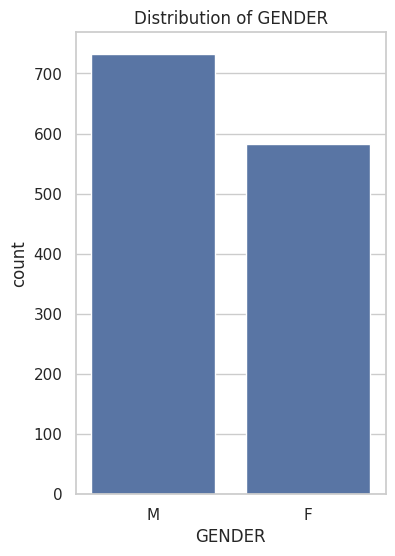

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# Plot distribution of 'GENDER'
plt.figure(figsize=(4, 6))
sns.countplot(x='GENDER', data=df)
plt.title('Distribution of GENDER')
plt.show()

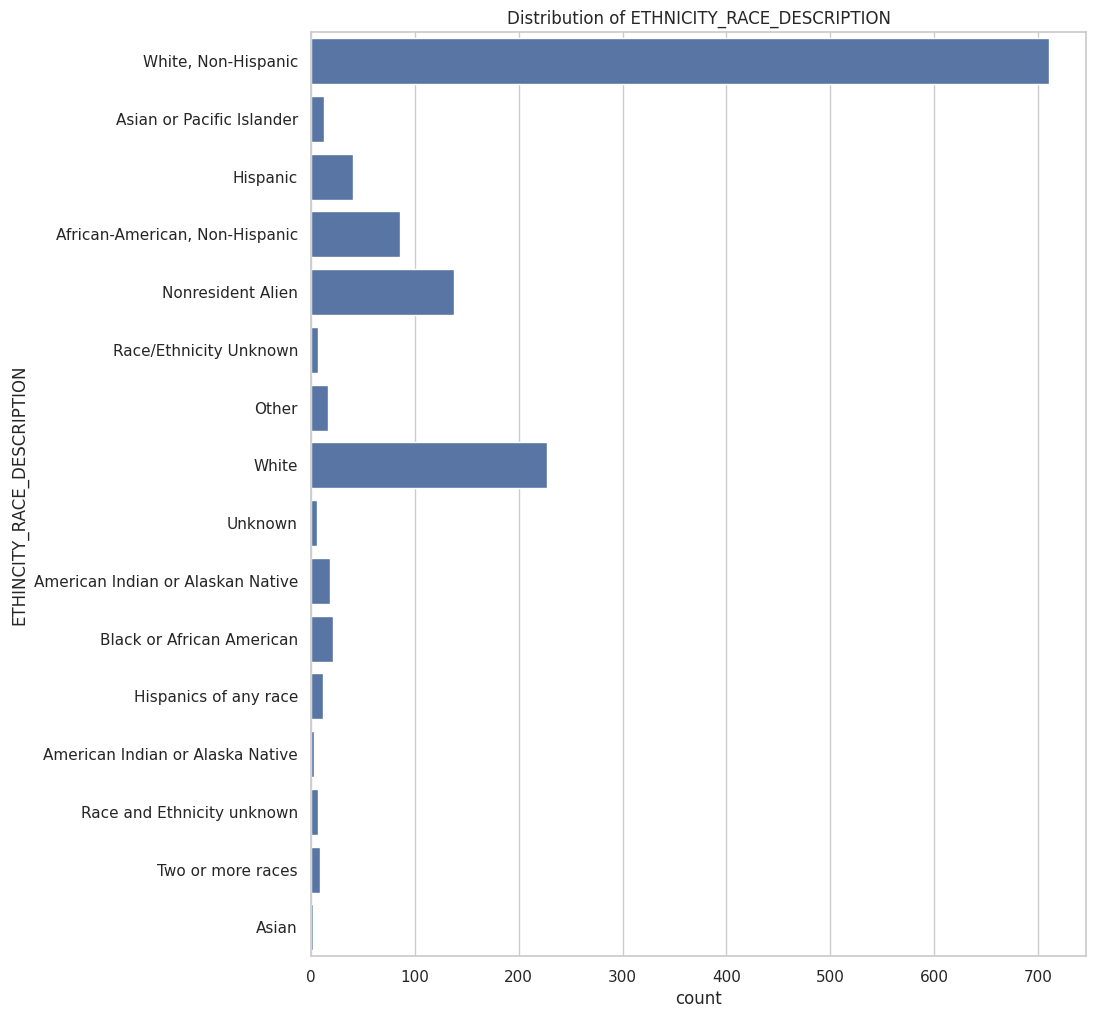

In [ ]:
# Plot distribution of 'ETHINCITY_RACE_DESCRIPTION'
plt.figure(figsize=(10, 12))
sns.countplot(y='ETHINCITY_RACE_DESCRIPTION', data=df)
plt.title('Distribution of ETHNICITY_RACE_DESCRIPTION')
#plt.xticks(rotation=180, ha='right')  # Rotate x-axis labels for better readability
plt.show()


#concatenate race `


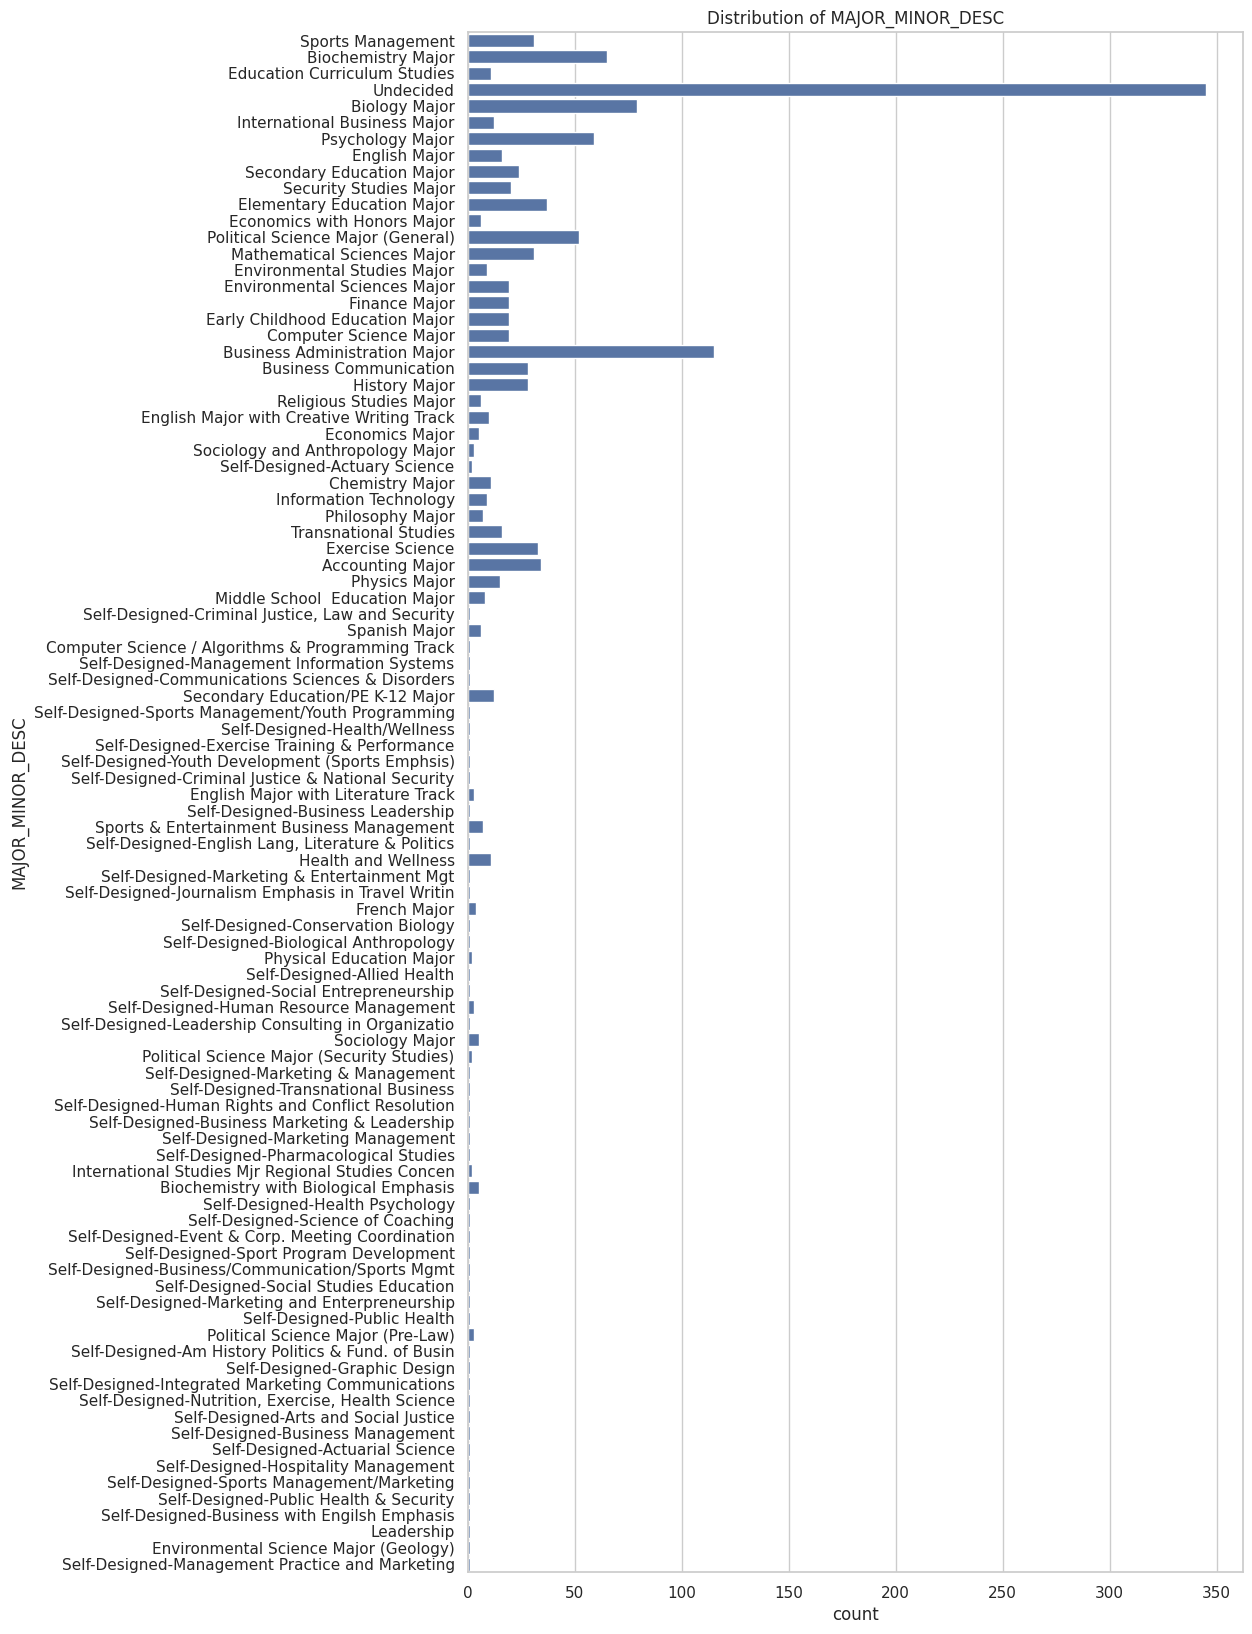

In [ ]:
# Plot distribution of 'MAJOR_MINOR_DESC'
plt.figure(figsize=(10, 20))
sns.countplot(y='MAJOR_MINOR_DESC', data=df)
plt.title('Distribution of MAJOR_MINOR_DESC')
#plt.xticks(rotation=90, ha='right')
plt.show()

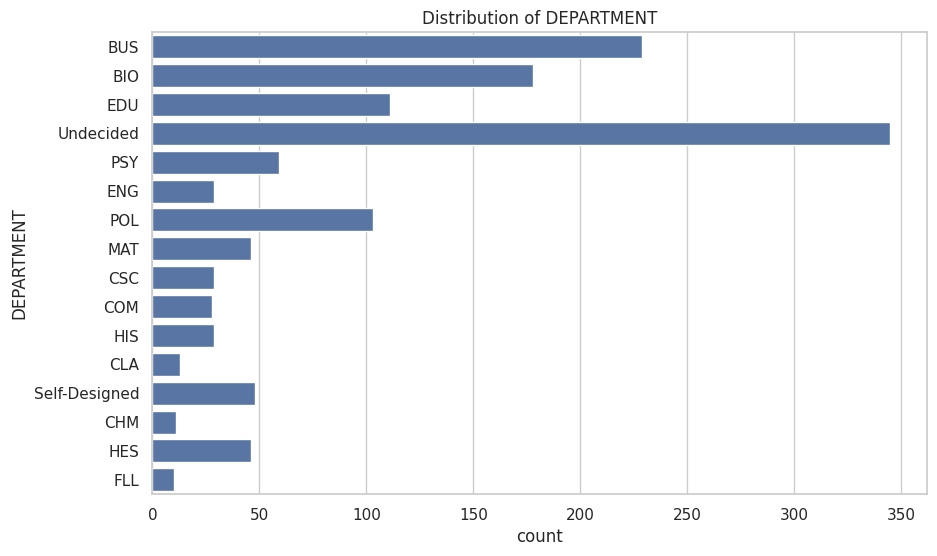

In [ ]:
# Plot distribution of 'DEPARTMENT'
plt.figure(figsize=(10, 6))
sns.countplot(y='DEPARTMENT', data=df)
plt.title('Distribution of DEPARTMENT')
plt.show()

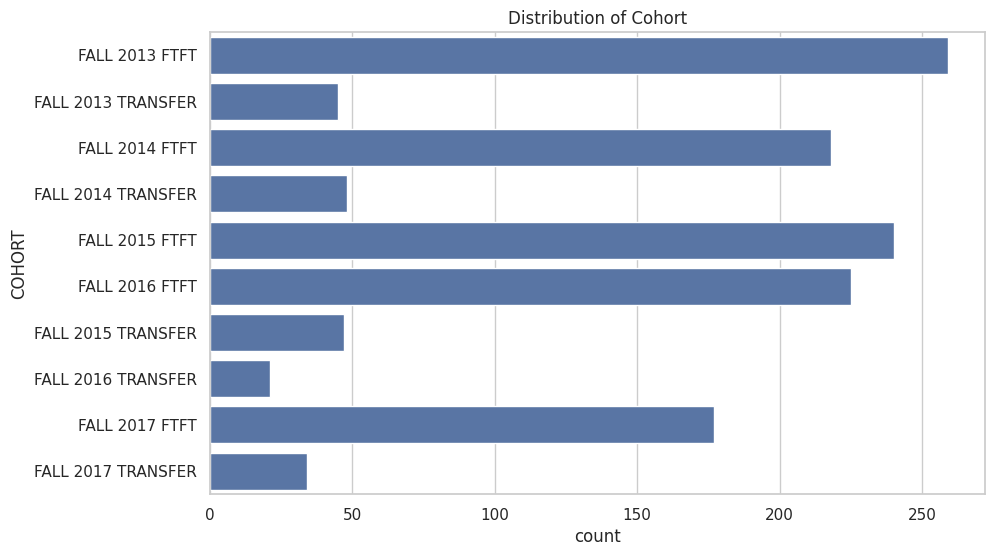

In [ ]:
# Plot distribution of 'COHORT'
plt.figure(figsize=(10, 6))
sns.countplot(y='COHORT', data=df)
plt.title('Distribution of Cohort')
plt.show()

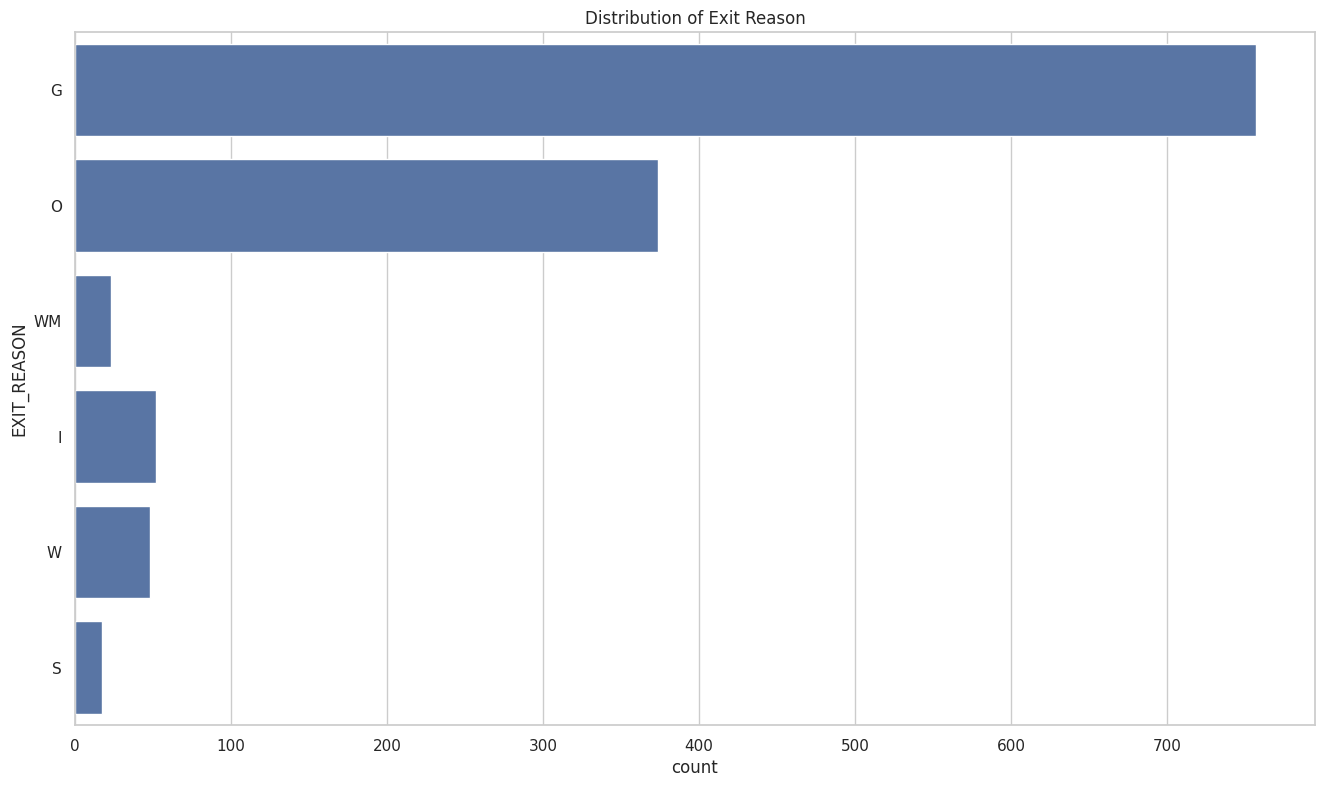

In [ ]:
# Plot distribution of 'EXIT_REASON'
plt.figure(figsize=(16, 9))
sns.countplot(y='EXIT_REASON', data=df)
plt.title('Distribution of Exit Reason')
plt.show()

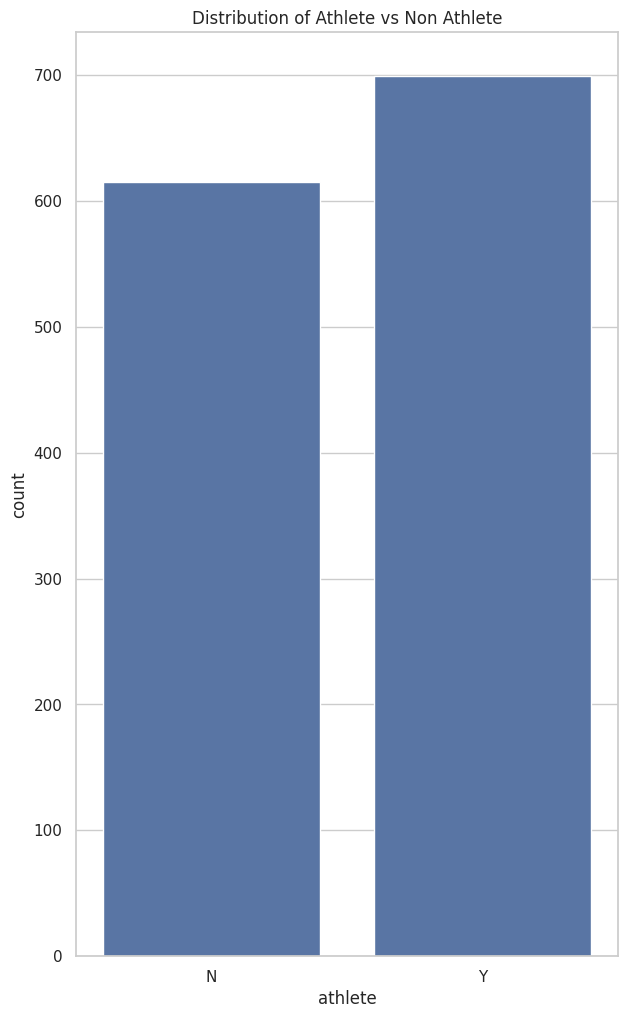

In [ ]:
# Plot distribution of Athlete vs Non Athlete
plt.figure(figsize=(7, 12))
sns.countplot(x='athlete', data=df)
plt.title('Distribution of Athlete vs Non Athlete')
plt.show()

<Axes: >

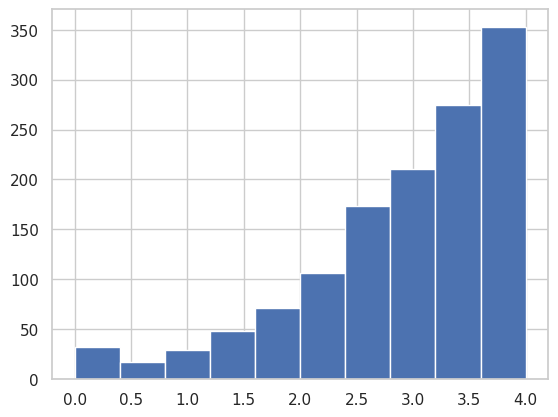

In [ ]:
df.CAREER_GPA.hist()

<Axes: >

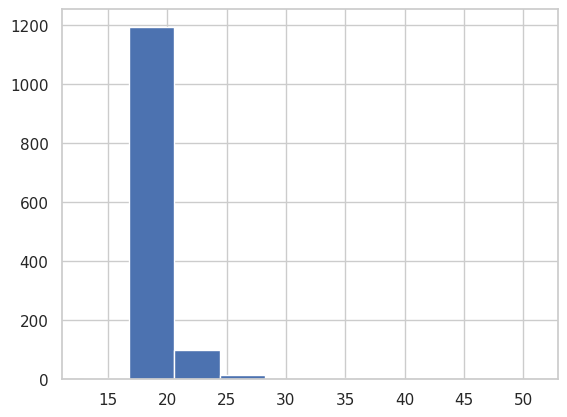

In [ ]:
df.AGE.hist()

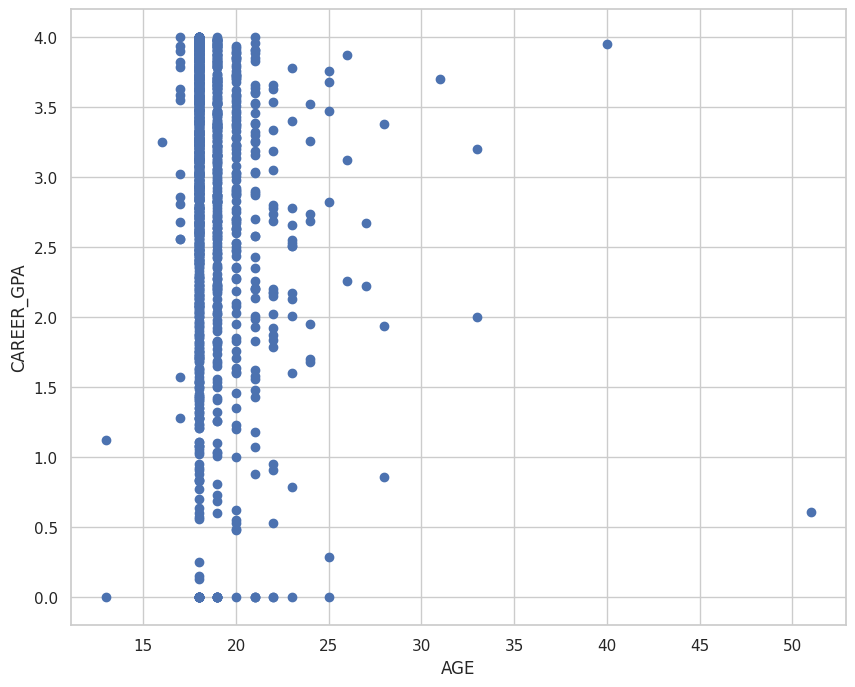

In [ ]:
#scatterplott career gpa x age

plt.figure(figsize=(10, 8))
plt.scatter(df['AGE'], df['CAREER_GPA'])
plt.xlabel('AGE')
plt.ylabel('CAREER_GPA')
plt.show()

# **CREATING SUB DATASETS**

** Graduates EDA**

In [ ]:
# students who graduated from westminster only
graduates_df = df[df['DTE_DEGR_CONFERRED'].notna()]

graduates_df.head()
print(graduates_df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
4      447033      M        White, Non-Hispanic 1994-07-22   
7      449361      F        White, Non-Hispanic 1995-07-20   
...       ...    ...                        ...        ...   
1307  1715897      M                      White 1997-12-04   
1308  1715929      M          Two or more races 1997-01-19   
1309  1715933      F  Black or African American 1996-03-18   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                   MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA  \
0                 Sports Management        BUS        2.64   
1                Biochemistry Major        BIO        3.18   
2      Education Curriculum Studies        EDU        2.86   
4      

<Axes: >

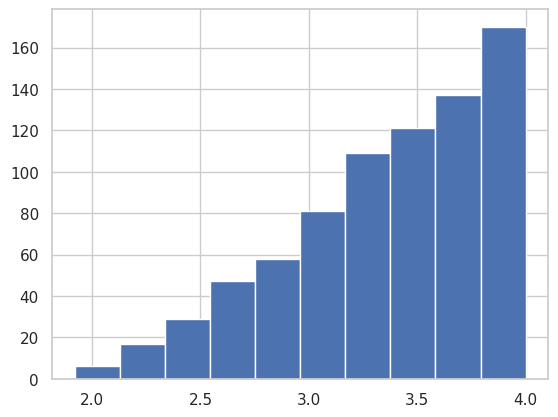

In [ ]:
graduates_df.CAREER_GPA.hist()

<Axes: >

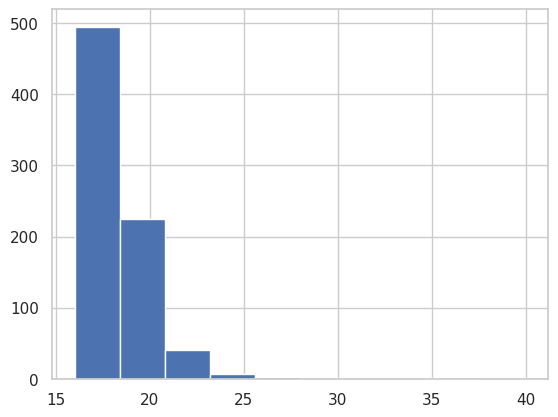

In [ ]:
graduates_df.AGE.hist()

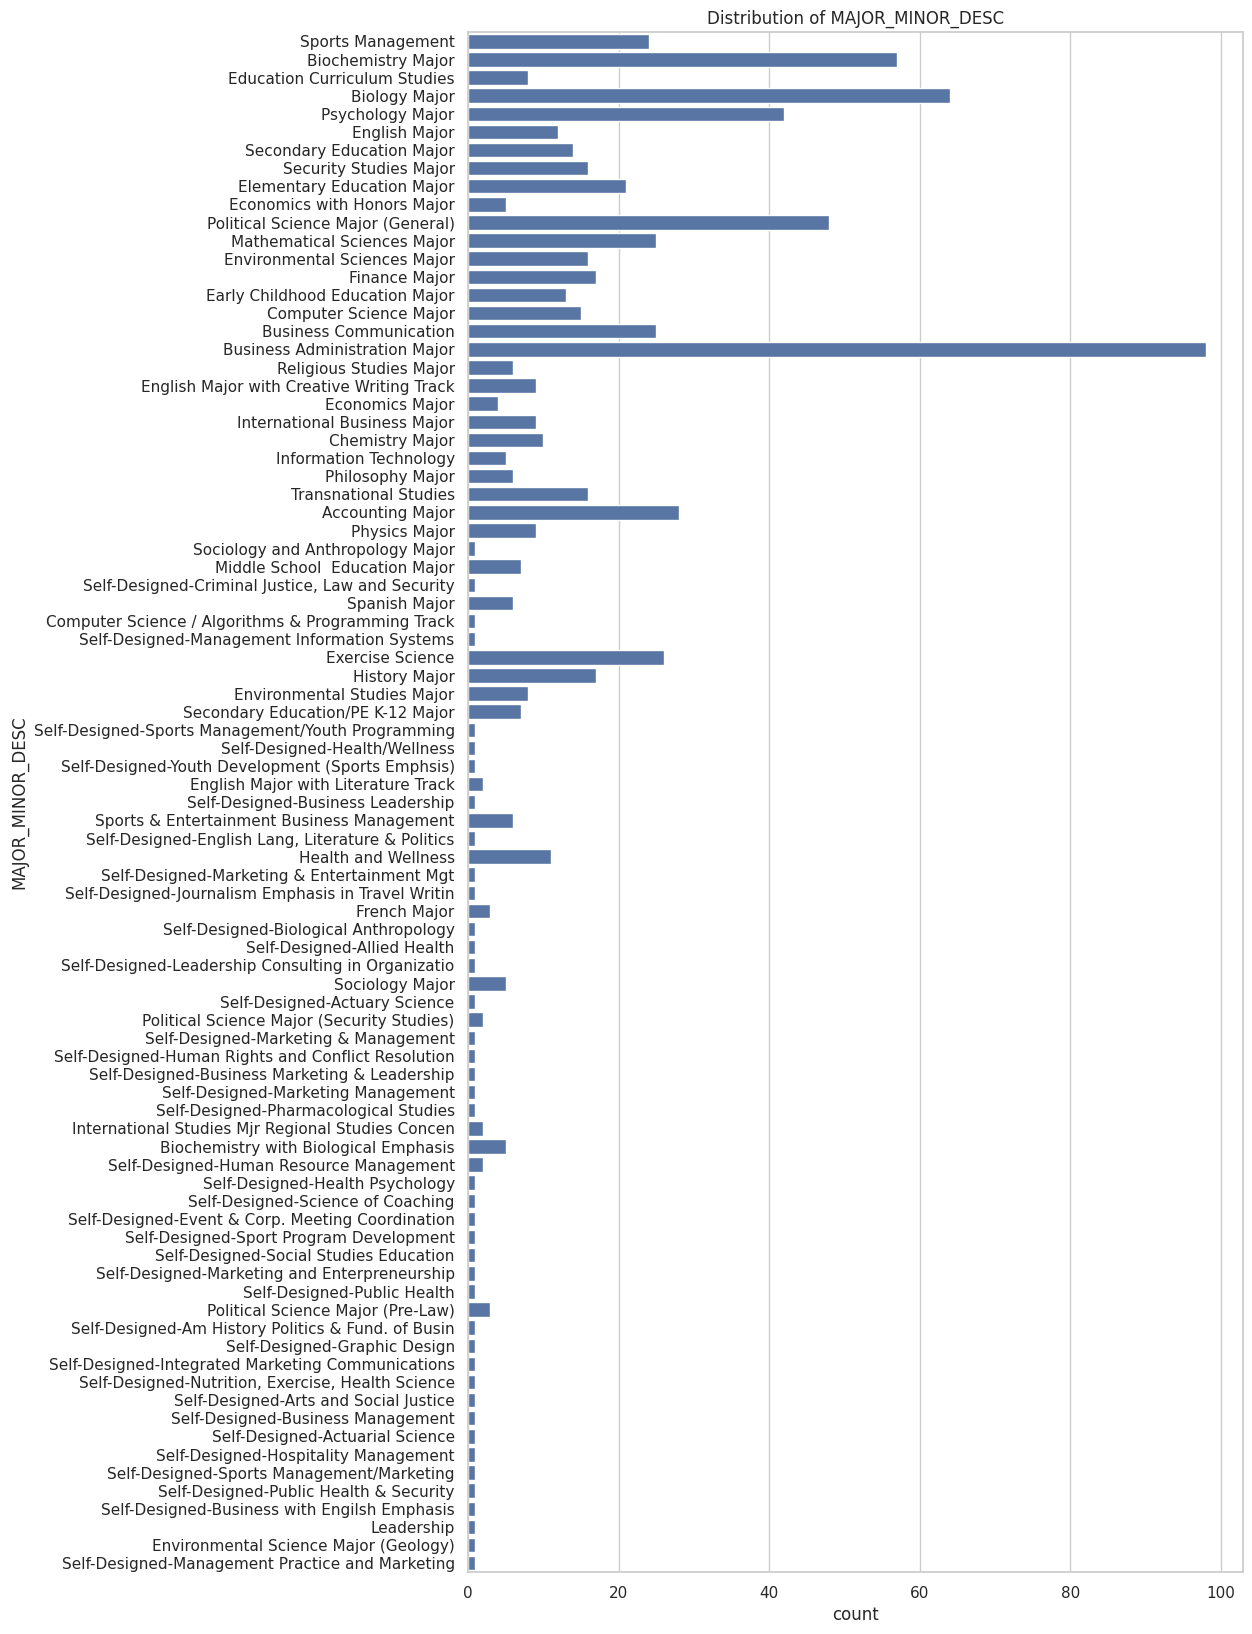

In [ ]:
# Plot distribution of 'MAJOR_MINOR_DESC'
plt.figure(figsize=(10, 20))
sns.countplot(y='MAJOR_MINOR_DESC', data=graduates_df)
plt.title('Distribution of MAJOR_MINOR_DESC')
#plt.xticks(rotation=90, ha='right')
plt.show()

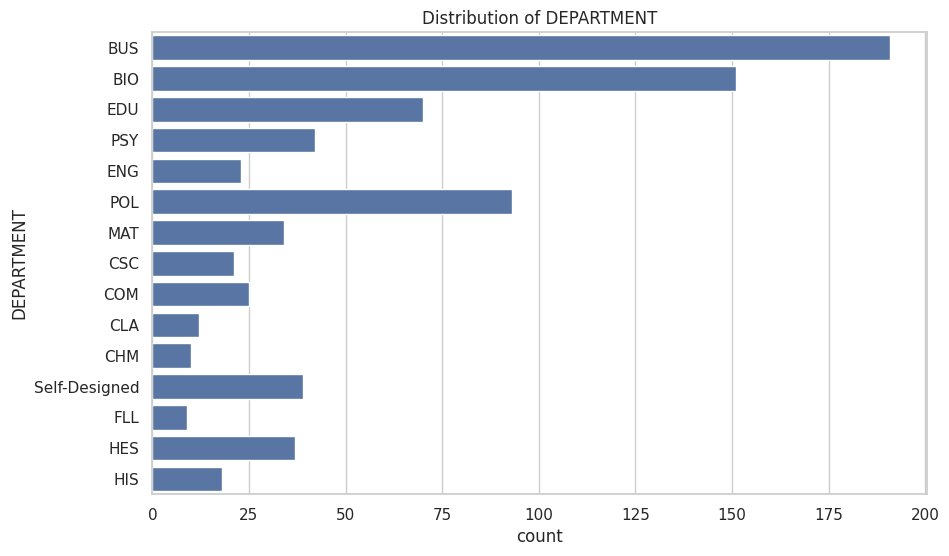

In [ ]:
# Plot distribution of 'DEPARTMENT'
plt.figure(figsize=(10, 6))
sns.countplot(y='DEPARTMENT', data=graduates_df)
plt.title('Distribution of DEPARTMENT')
plt.show()

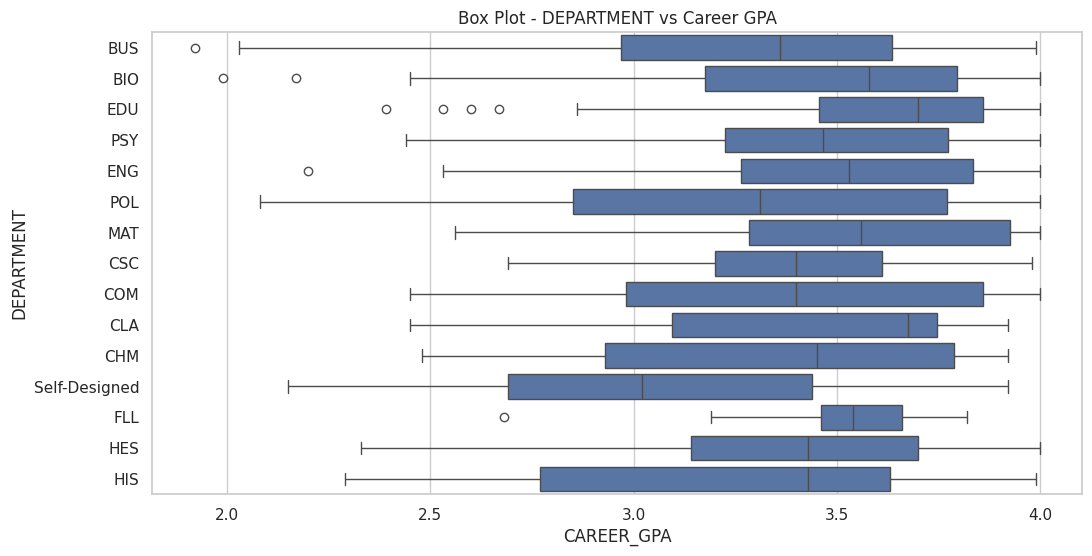

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='DEPARTMENT', x='CAREER_GPA', data=graduates_df)
plt.title('Box Plot - DEPARTMENT vs Career GPA')
plt.show()

In [ ]:
#One way Anova testing : used to compare the mean GPA of different departments

from scipy.stats import f_oneway
#  groups based on 'department'
departments = graduates_df['DEPARTMENT'].unique()
department_groups = [graduates_df['CAREER_GPA'][graduates_df['DEPARTMENT'] == DEPARTMENT] for DEPARTMENT in departments]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*department_groups)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in average grades among departments.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in average grades among departments.')

F-statistic: 5.013750534880088
P-value: 5.098628638810923e-09
Reject the null hypothesis. There is a significant difference in average grades among departments.


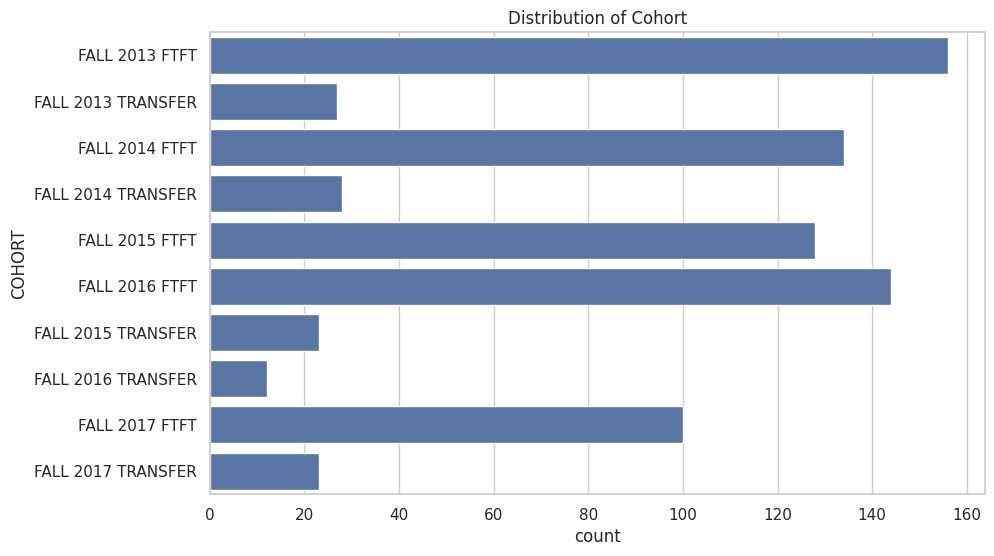

In [ ]:
# Plot distribution of 'COHORT'
plt.figure(figsize=(10, 6))
sns.countplot(y='COHORT', data=graduates_df)
plt.title('Distribution of Cohort')
plt.show()

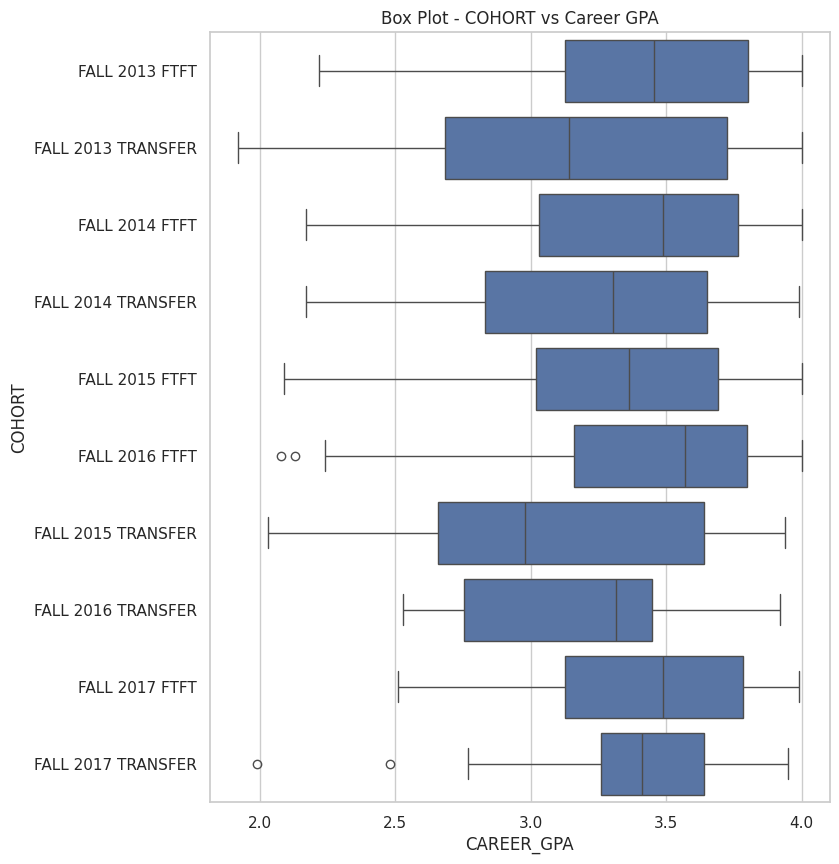

In [ ]:
plt.figure(figsize=(8, 10))
sns.boxplot(y='COHORT', x='CAREER_GPA', data=graduates_df)
plt.title('Box Plot - COHORT vs Career GPA')
plt.show()

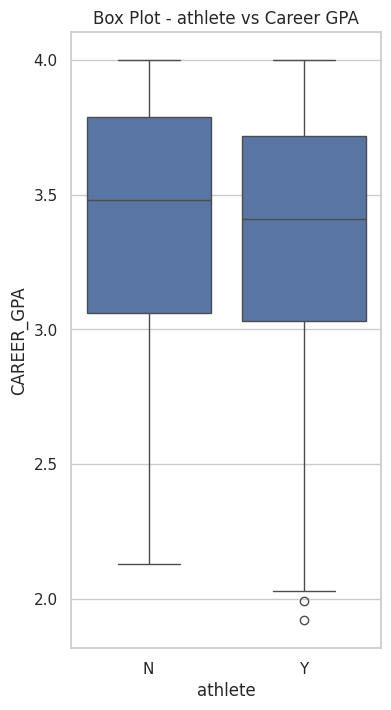

In [ ]:
plt.figure(figsize=(4, 8))
sns.boxplot(x='athlete', y='CAREER_GPA', data=graduates_df)
plt.title('Box Plot - athlete vs Career GPA')
plt.show()

In [ ]:
#next step: do 2 sample t test to see if means significantly different

In [ ]:
from scipy.stats import ttest_ind

#athletes / non athletes subgroups

athlete_grad = graduates_df['CAREER_GPA'][graduates_df['athlete']== 'Y']
nonathlete_grad = graduates_df['CAREER_GPA'][graduates_df['athlete']== 'N']

#two sample t test
t_statistic, p_value = ttest_ind(athlete_grad, nonathlete_grad)

#results

print(f'T-statistics: {t_statistic}')
print(f'P-value:{p_value}')

# result interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in average grades between athlete and non athlete students.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in average grades between athlete and non athlete students.')


T-statistics: -0.9466127570655798
P-value:0.34413195111109385
Fail to reject the null hypothesis. There is no significant difference in average grades between athlete and non athlete students.


In [ ]:
#grad athletes data only
# filtering athletes row
grad_athletes_df = graduates_df[graduates_df['athlete'] == 'Y']

print(grad_athletes_df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
1      446698      F        White, Non-Hispanic 1995-07-17   
7      449361      F        White, Non-Hispanic 1995-07-20   
11     453228      F        White, Non-Hispanic 1995-06-20   
12     454013      M        White, Non-Hispanic 1994-10-13   
14     454237      F        White, Non-Hispanic 1995-07-28   
...       ...    ...                        ...        ...   
1301  1715826      M                      White 1998-01-07   
1303  1715833      M                      White 1998-03-31   
1307  1715897      M                      White 1997-12-04   
1309  1715933      F  Black or African American 1996-03-18   
1312  1715953      F                      White 1996-08-07   

                   MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA  \
1                Biochemistry Major        BIO        3.18   
7                     Biology Major        BIO        3.23   
11                    English Major        ENG        3.90   
12     

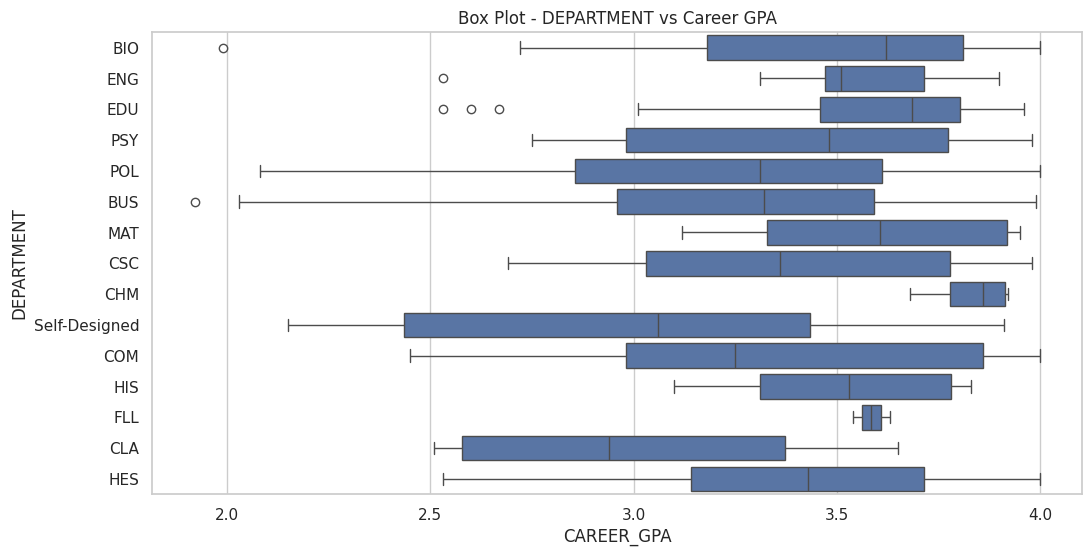

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='DEPARTMENT', x='CAREER_GPA', data=grad_athletes_df)
plt.title('Box Plot - DEPARTMENT vs Career GPA')
plt.show()

In [ ]:
# athlete retention vs non athlete retention


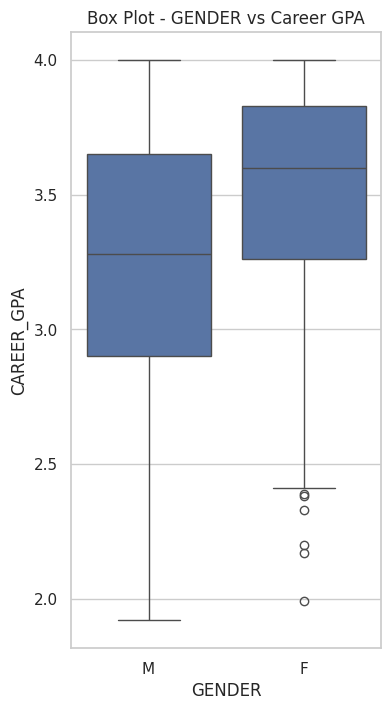

In [ ]:
plt.figure(figsize=(4, 8))
sns.boxplot(x='GENDER', y='CAREER_GPA', data=graduates_df)
plt.title('Box Plot - GENDER vs Career GPA')
plt.show()

In [ ]:
#next step: do 2 sample t test to see if means significantly different

In [ ]:
from scipy.stats import ttest_ind
#MF subgroups
male_grad_grades = graduates_df['CAREER_GPA'][graduates_df['GENDER'] == 'M']
female_grad_grades = graduates_df['CAREER_GPA'][graduates_df['GENDER'] == 'F']

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(male_grad_grades, female_grad_grades)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in average grades between male and female students.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in average grades between male and female students.')

T-statistic: -7.906718816567975
P-value: 9.116599067590415e-15
Reject the null hypothesis. There is a significant difference in average grades between male and female students.


In [ ]:
#PREDICT GPA ?

# Define bin edges (GPA)
bin_edges = [2.5, 3.0 , 3.6, 3.8,4.00, float('inf')]

# Define bin labels
bin_labels = ['2.00 - 2.50 GPA', '2.50 -3.00 GPA','3.00 - 3.60 GPA', '3.60 - 3.80 GPA ', '3.80 - 4.00 GPA']

# Create a new categorical variable 'Survival years'
graduates_df['GPA_GROUP'] = pd.cut(graduates_df['CAREER_GPA'], bins=bin_edges, labels=bin_labels, right=False)


print(graduates_df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
4      447033      M        White, Non-Hispanic 1994-07-22   
7      449361      F        White, Non-Hispanic 1995-07-20   
...       ...    ...                        ...        ...   
1307  1715897      M                      White 1997-12-04   
1308  1715929      M          Two or more races 1997-01-19   
1309  1715933      F  Black or African American 1996-03-18   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                   MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA  \
0                 Sports Management        BUS        2.64   
1                Biochemistry Major        BIO        3.18   
2      Education Curriculum Studies        EDU        2.86   
4      

<ipython-input-34-46d62b7f0791>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduates_df['GPA_GROUP'] = pd.cut(graduates_df['CAREER_GPA'], bins=bin_edges, labels=bin_labels, right=False)


In [ ]:
#converting categorical variables to numerical

categorical_columns = graduates_df.select_dtypes(include='object').columns.difference(['GPA_GROUP'])

# Create dummy variables for categorical columns
df_dummies = pd.get_dummies(graduates_df[categorical_columns], prefix=categorical_columns)

# Concatenate the original DataFrame with the dummy variables
ML_graduates_df = pd.concat([graduates_df, df_dummies], axis=1)

# Drop the original categorical columns
ML_graduates_df.drop(categorical_columns, axis=1, inplace=True)

# Display the updated DataFrame
print(ML_graduates_df)

       ID_NUM        DOB  CAREER_GPA DTE_DEGR_CONFERRED  EXIT_DATE  \
0      290363 1995-05-12        2.64         2017-05-13 2017-05-13   
1      446698 1995-07-17        3.18         2017-05-13 2017-05-13   
2      446761 1995-04-15        2.86         2017-05-13 2017-05-13   
4      447033 1994-07-22        3.94         2017-05-13 2017-05-13   
7      449361 1995-07-20        3.23         2017-05-13 2017-05-13   
...       ...        ...         ...                ...        ...   
1307  1715897 1997-12-04        3.67         2019-12-31 2019-12-31   
1308  1715929 1997-01-19        2.48         2019-05-11 2019-05-11   
1309  1715933 1996-03-18        1.99         2019-05-11 2019-05-11   
1312  1715953 1996-08-07        3.26         2019-05-11 2019-05-11   
1313  1715958 1993-07-17        3.52         2018-12-31 2018-12-31   

     COHORT_DATE   AGE         GPA_GROUP  CANDIDACY_TYPE_1  CANDIDACY_TYPE_2  \
0     2013-09-01  18.0   2.00 - 2.50 GPA                 0                 0   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Select predictors (all columns except 'Survival months' and the target variable 'Survival years')
predictors = ML_graduates_df.drop(['CAREER_GPA', 'GPA_GROUP', 'DOB', 'DTE_DEGR_CONFERRED', 'EXIT_DATE', 'COHORT_DATE'], axis=1)

# Encode the target variable 'Survival years' to numeric values
target = ML_graduates_df['GPA_GROUP'].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)


Accuracy: 0.3484

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         8
           0       0.33      0.13      0.19        31
           1       0.40      0.68      0.51        56
           2       0.40      0.19      0.26        32
           3       0.22      0.22      0.22        27
           4       0.00      0.00      0.00         1

    accuracy                           0.35       155
   macro avg       0.23      0.20      0.20       155
weighted avg       0.33      0.35      0.31       155



# **CREATING SUB DATASETS**

**athletes and non athletes**


In [ ]:
# non athletes data
# filtering non athletes rows
non_athletes_df = df[df['athlete'] == 'N']

non_athletes_df.head()

,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport,COHORT_DATE,AGE
0,290363,M,"White, Non-Hispanic",1995-05-12,Sports Management,BUS,2.64,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN,2013-09-01,18.0
2,446761,M,"White, Non-Hispanic",1995-04-15,Education Curriculum Studies,EDU,2.86,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN,2013-09-01,18.0
4,447033,M,"White, Non-Hispanic",1994-07-22,Biochemistry Major,BIO,3.94,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN,2013-09-01,19.0
5,448452,F,"White, Non-Hispanic",1994-10-09,Undecided,Undecided,1.87,FALL 2013 FTFT,1,NaT,O,2014-05-08,N,NaN,2013-09-01,18.0
6,449360,F,"White, Non-Hispanic",1995-03-28,Undecided,Undecided,1.90,FALL 2013 FTFT,F,NaT,O,2014-12-13,N,NaN,2013-09-01,18.0


In [ ]:
# athletes data only
# filtering athletes row
athletes_df = df[df['athlete'] == 'Y']

athletes_df.head()

,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport,COHORT_DATE,AGE
1,446698,F,"White, Non-Hispanic",1995-07-17,Biochemistry Major,BIO,3.18,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Tennis--Women,2013-09-01,18.0
3,447029,M,Asian or Pacific Islander,1995-04-23,Undecided,Undecided,2.71,FALL 2013 FTFT,F,NaT,O,2014-05-08,Y,Soccer--Men,2013-09-01,18.0
7,449361,F,"White, Non-Hispanic",1995-07-20,Biology Major,BIO,3.23,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Cheerleading,2013-09-01,18.0
8,450208,M,"White, Non-Hispanic",1993-04-24,Undecided,Undecided,0.62,FALL 2013 FTFT,F,NaT,O,2013-12-14,Y,Football,2013-09-01,20.0
11,453228,F,"White, Non-Hispanic",1995-06-20,English Major,ENG,3.90,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Basketball-Women,2013-09-01,18.0


In [ ]:
athletes_df.describe()

,ID_NUM,CAREER_GPA
count,6.990000e+02,699.000000
mean,1.049785e+06,2.893748
std,5.942328e+05,0.880764
min,4.436210e+05,0.000000
25%,4.682260e+05,2.410000
50%,4.799030e+05,3.110000
75%,1.662532e+06,3.590000
max,1.721699e+06,4.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

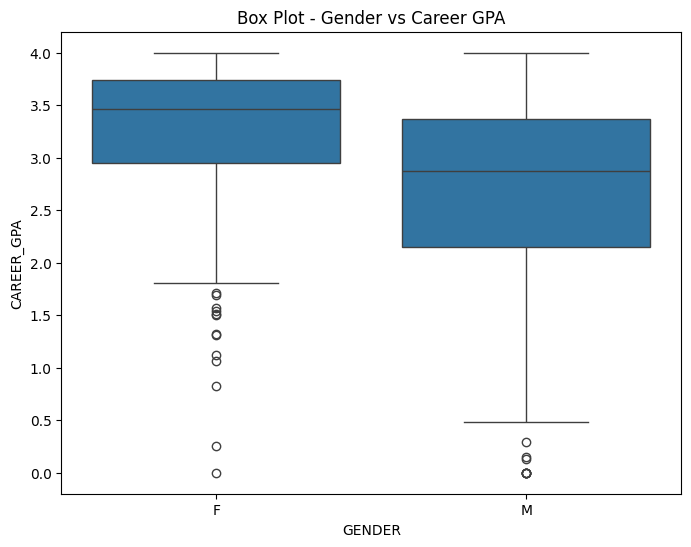

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GENDER', y='CAREER_GPA', data=athletes_df)
plt.title('Box Plot - Gender vs Career GPA')
plt.show()

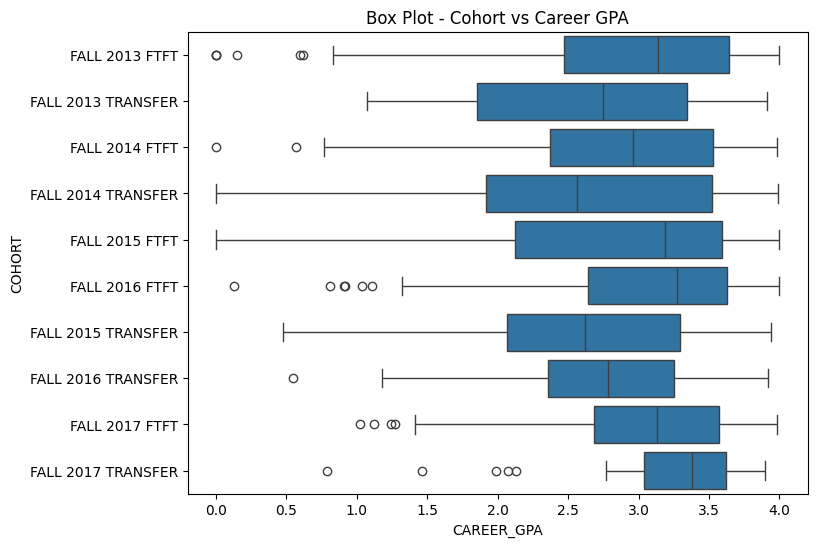

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='COHORT', x='CAREER_GPA', data=athletes_df)
plt.title('Box Plot - Cohort vs Career GPA')
plt.show()

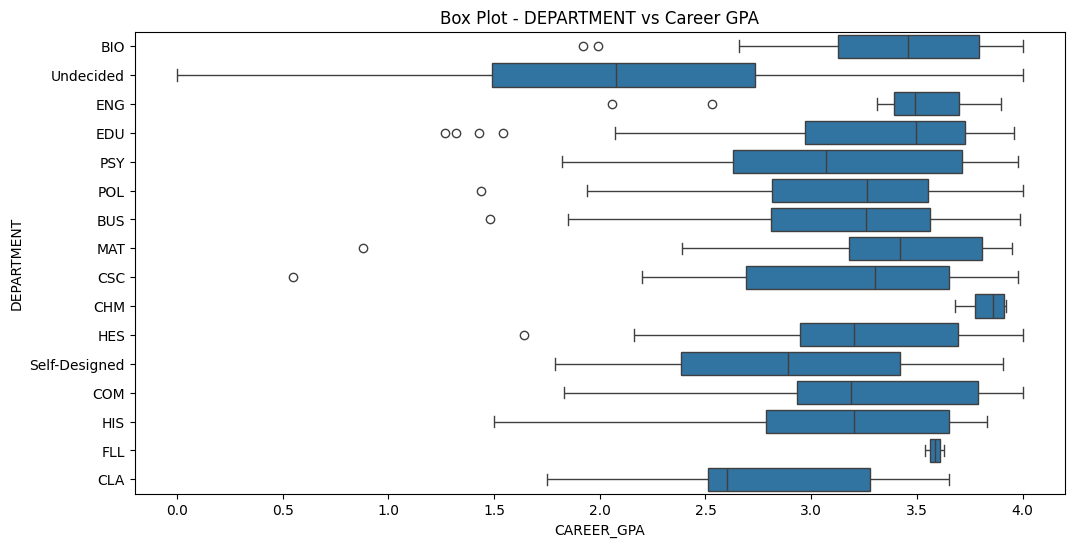

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='DEPARTMENT', x='CAREER_GPA', data=athletes_df)
plt.title('Box Plot - DEPARTMENT vs Career GPA')
plt.show()

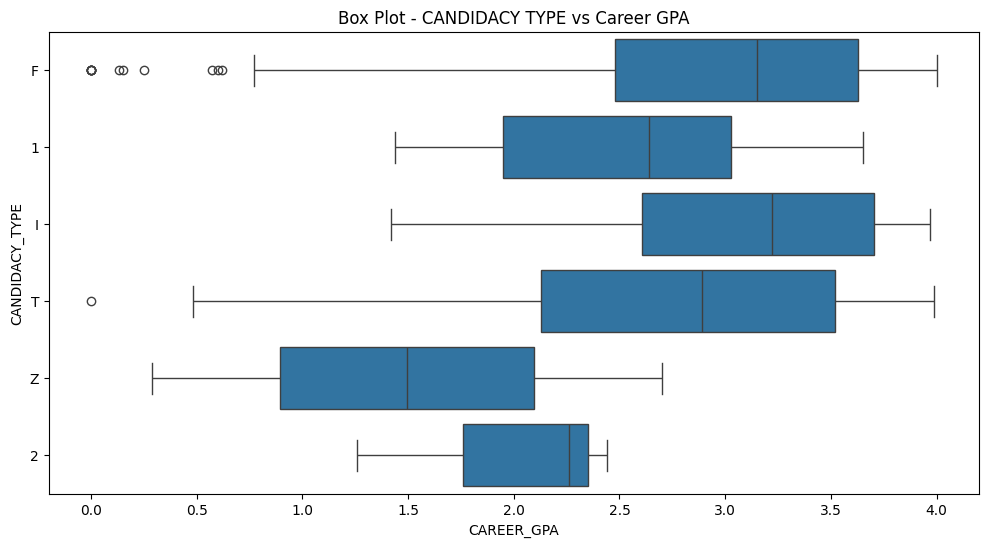

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='CANDIDACY_TYPE', x='CAREER_GPA', data=athletes_df)
plt.title('Box Plot - CANDIDACY TYPE vs Career GPA')
plt.show()

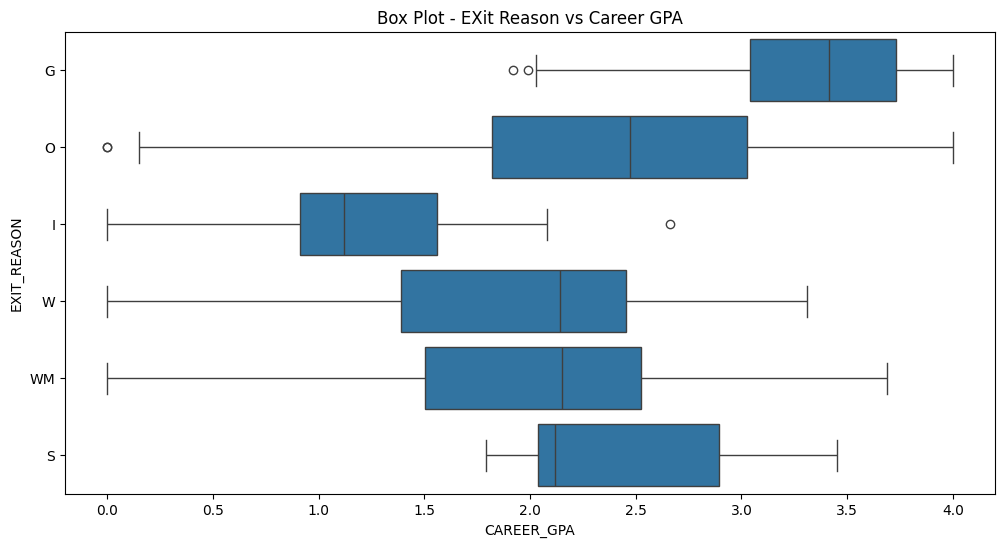

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='EXIT_REASON', x='CAREER_GPA', data=athletes_df)
plt.title('Box Plot - EXit Reason vs Career GPA')
plt.show()

# SUBSETS : MALE AND FEMALE ATHLETES

In [ ]:
# female athletes data only
fem_athletes_df = athletes_df[athletes_df['GENDER'] == 'F']
fem_athletes_df.head()

,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport
1,446698,F,"White, Non-Hispanic",1995-07-17,Biochemistry Major,BIO,3.18,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Tennis--Women
7,449361,F,"White, Non-Hispanic",1995-07-20,Biology Major,BIO,3.23,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Cheerleading
11,453228,F,"White, Non-Hispanic",1995-06-20,English Major,ENG,3.90,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Basketball-Women
14,454237,F,"White, Non-Hispanic",1995-07-28,Psychology Major,PSY,2.78,FALL 2013 FTFT,F,2017-08-31,G,2017-08-31,Y,Cheerleading
22,455516,F,"White, Non-Hispanic",1995-04-07,Political Science Major (General),POL,3.34,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Golf--Women


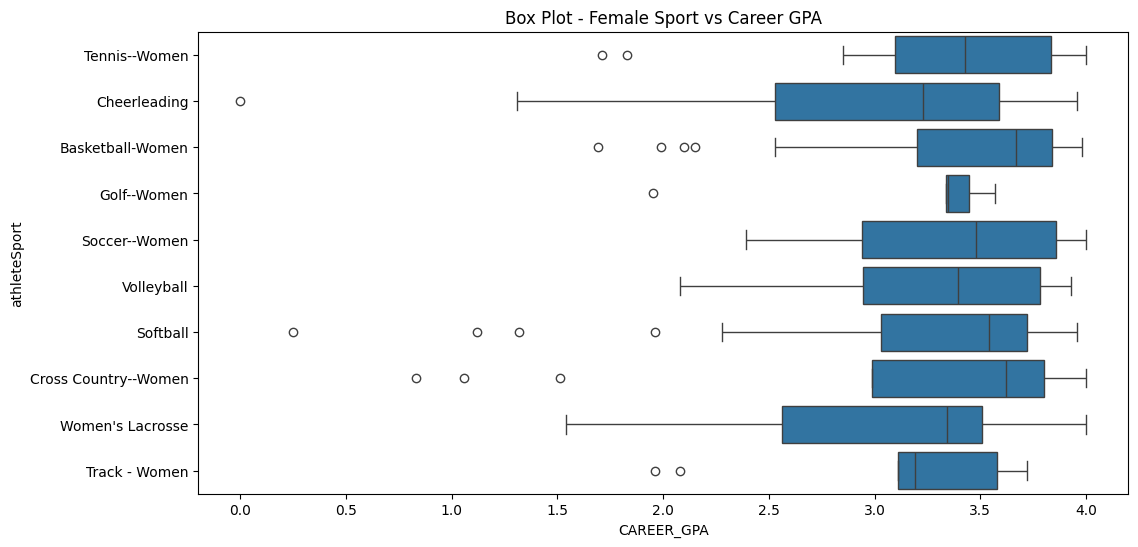

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='athleteSport', x='CAREER_GPA', data=fem_athletes_df)
plt.title('Box Plot - Female Sport vs Career GPA')
plt.show()

In [ ]:
# male athletes data only
male_athletes_df = athletes_df[athletes_df['GENDER'] == 'M']

male_athletes_df.head()

,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport,COHORT_DATE,AGE
3,447029,M,Asian or Pacific Islander,1995-04-23,Undecided,Undecided,2.71,FALL 2013 FTFT,F,NaT,O,2014-05-08,Y,Soccer--Men,2013-09-01,18.0
8,450208,M,"White, Non-Hispanic",1993-04-24,Undecided,Undecided,0.62,FALL 2013 FTFT,F,NaT,O,2013-12-14,Y,Football,2013-09-01,20.0
12,454013,M,"White, Non-Hispanic",1994-10-13,Secondary Education Major,EDU,3.70,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Football,2013-09-01,18.0
15,454326,M,Hispanic,1995-05-07,Security Studies Major,POL,2.86,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Soccer--Men,2013-09-01,18.0
18,454773,M,"White, Non-Hispanic",1995-08-24,Economics with Honors Major,BUS,3.90,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Baseball,2013-09-01,18.0


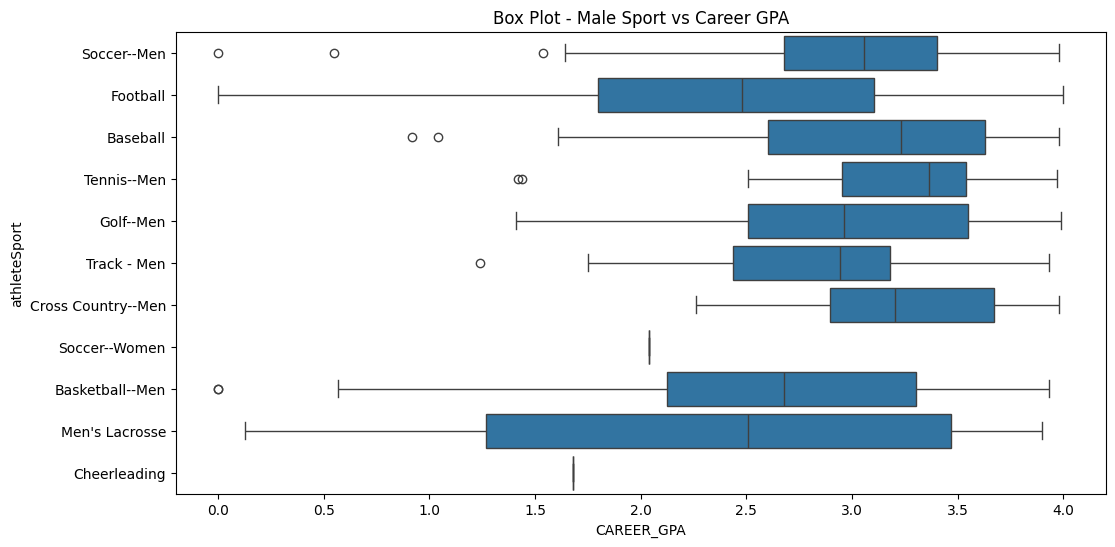

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='athleteSport', x='CAREER_GPA', data=male_athletes_df)
plt.title('Box Plot - Male Sport vs Career GPA')
plt.show()


Calculate and comapre graduation rates

Hypothesis Testing

two sample t test
anova testing


# GRADUATION RATES


In [ ]:
# 2013 FTFT cohort athletes data only
athletes_df_2013 = athletes_df[athletes_df['COHORT'] == 'FALL 2013 FTFT']

athletes_df_2013.head()

,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport
1,446698,F,"White, Non-Hispanic",1995-07-17,Biochemistry Major,BIO,3.18,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Tennis--Women
3,447029,M,Asian or Pacific Islander,1995-04-23,Undecided,Undecided,2.71,FALL 2013 FTFT,F,NaT,O,2014-05-08,Y,Soccer--Men
7,449361,F,"White, Non-Hispanic",1995-07-20,Biology Major,BIO,3.23,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Cheerleading
8,450208,M,"White, Non-Hispanic",1993-04-24,Undecided,Undecided,0.62,FALL 2013 FTFT,F,NaT,O,2013-12-14,Y,Football
11,453228,F,"White, Non-Hispanic",1995-06-20,English Major,ENG,3.90,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Basketball-Women


In [ ]:
#Summary that also includes dates
grad_dates_2013= athletes_df_2013.describe(include=[ 'datetime'])

print(grad_dates_2013)


#6 grad rate applies to May 2019

                        DOB   DTE_DEGR_CONFERRED            EXIT_DATE
count                   133                   80                  133
unique                  117                   11                   25
top     1995-07-17 00:00:00  2017-05-13 00:00:00  2017-05-13 00:00:00
freq                      2                   55                   56
first   1987-08-05 00:00:00  2016-05-07 00:00:00  2013-08-26 00:00:00
last    1995-09-01 00:00:00  2019-12-31 00:00:00  2019-12-31 00:00:00


<ipython-input-31-f3b0790dbe2f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  grad_dates_2013= athletes_df_2013.describe(include=[ 'datetime'])
<ipython-input-31-f3b0790dbe2f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  grad_dates_2013= athletes_df_2013.describe(include=[ 'datetime'])
<ipython-input-31-f3b0790dbe2f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  grad_dates_2013=

In [ ]:
athletes_df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1 to 1083
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_NUM                      133 non-null    int64         
 1   GENDER                      133 non-null    object        
 2   ETHINCITY_RACE_DESCRIPTION  133 non-null    object        
 3   DOB                         133 non-null    datetime64[ns]
 4   MAJOR_MINOR_DESC            133 non-null    object        
 5   DEPARTMENT                  133 non-null    object        
 6   CAREER_GPA                  133 non-null    float64       
 7   COHORT                      133 non-null    object        
 8   CANDIDACY_TYPE              133 non-null    object        
 9   DTE_DEGR_CONFERRED          80 non-null     datetime64[ns]
 10  EXIT_REASON                 133 non-null    object        
 11  EXIT_DATE                   133 non-null    datetime64[ns

In [ ]:
# counts for graduation dates
grad_dates_count_2013 = athletes_df_2013['DTE_DEGR_CONFERRED'].value_counts()
print(" Date degree conferred 2013 cohort")
print(grad_dates_count_2013 )

 Date degree conferred 2013 cohort
2017-05-13    55
2017-12-31    10
2017-08-31     3
2016-05-07     3
2016-12-31     2
2019-05-11     2
2018-05-12     1
2019-08-31     1
2018-08-31     1
2019-12-31     1
2018-12-31     1
Name: DTE_DEGR_CONFERRED, dtype: int64


In [ ]:
Total_2013_FTFT = 133
Total_2013_Graduates= 80
Total_2013_6yGrad = 78

Graduation_Rate_2013_Athl = Total_2013_6yGrad/Total_2013_FTFT
print(Graduation_Rate_2013_Athl)

0.5864661654135338


In [ ]:
# 2017 FTFT cohort athletes data only
athletes_df_2017 = athletes_df[athletes_df['COHORT'] == 'FALL 2017 FTFT']

athletes_df_2017.head()

,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport
1104,476177,M,White,1999-06-21,Biochemistry Major,BIO,3.98,FALL 2017 FTFT,F,2021-05-08,G,2021-05-08,Y,Soccer--Men
1105,476728,M,Race and Ethnicity unknown,1999-05-25,Political Science Major (General),POL,2.70,FALL 2017 FTFT,F,2021-12-31,G,2021-12-31,Y,Football
1106,479903,M,White,1998-09-27,Philosophy Major,CLA,1.75,FALL 2017 FTFT,F,NaT,O,2019-12-13,Y,Track - Men
1108,480331,M,White,1999-02-04,Physical Education Major,HES,2.56,FALL 2017 FTFT,F,NaT,O,2020-05-07,Y,Baseball
1112,1698891,F,White,1998-11-05,Early Childhood Education Major,EDU,3.76,FALL 2017 FTFT,F,2021-05-08,G,2021-05-08,Y,Softball


In [ ]:
#Summary that also includes dates
grad_dates_2017= athletes_df_2017.describe(include=[ 'datetime'])

print(grad_dates_2017)

                        DOB   DTE_DEGR_CONFERRED            EXIT_DATE
count                   107                   61                  105
unique                   94                    6                   18
top     1999-06-21 00:00:00  2021-05-08 00:00:00  2021-05-08 00:00:00
freq                      2                   47                   47
first   1996-03-08 00:00:00  2020-12-31 00:00:00  2017-11-28 00:00:00
last    2004-05-25 00:00:00  2023-05-13 00:00:00  2023-08-03 00:00:00


<ipython-input-38-d040f5027a2b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  grad_dates_2017= athletes_df_2017.describe(include=[ 'datetime'])
<ipython-input-38-d040f5027a2b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  grad_dates_2017= athletes_df_2017.describe(include=[ 'datetime'])
<ipython-input-38-d040f5027a2b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  grad_dates_2017=

In [ ]:
athletes_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1104 to 1278
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_NUM                      107 non-null    int64         
 1   GENDER                      107 non-null    object        
 2   ETHINCITY_RACE_DESCRIPTION  107 non-null    object        
 3   DOB                         107 non-null    datetime64[ns]
 4   MAJOR_MINOR_DESC            107 non-null    object        
 5   DEPARTMENT                  107 non-null    object        
 6   CAREER_GPA                  107 non-null    float64       
 7   COHORT                      107 non-null    object        
 8   CANDIDACY_TYPE              107 non-null    object        
 9   DTE_DEGR_CONFERRED          61 non-null     datetime64[ns]
 10  EXIT_REASON                 105 non-null    object        
 11  EXIT_DATE                   105 non-null    datetime64

In [ ]:
# counts for graduation dates
grad_dates_count_2017 = athletes_df_2017['DTE_DEGR_CONFERRED'].value_counts()
print(" Date degree conferred 2017 cohort")
print(grad_dates_count_2017 )

 Date degree conferred 2017 cohort
2021-05-08    47
2021-12-31     5
2021-08-31     3
2020-12-31     3
2023-05-13     2
2022-08-31     1
Name: DTE_DEGR_CONFERRED, dtype: int64


In [ ]:
Total_2017_FTFT = 107
Total_2017_Graduates= 61
Total_2017_6yGrad = 61

Graduation_Rate_2017_Athl = Total_2017_6yGrad/Total_2017_FTFT
print(Graduation_Rate_2017_Athl)

0.5700934579439252


In [ ]:
# 2016 FTFT cohort athletes data only
athletes_df_2016 = athletes_df[athletes_df['COHORT'] == 'FALL 2016 FTFT']

athletes_df_2016.head()

,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport
702,476926,M,Nonresident Alien,1994-07-19,Self-Designed-Human Rights and Conflict Resolu...,Self-Designed,2.69,FALL 2016 FTFT,I,2020-05-09,G,2020-05-09,Y,Soccer--Men
856,460424,M,White,1998-03-03,Education Curriculum Studies,EDU,3.48,FALL 2016 FTFT,F,2020-05-09,G,2020-05-09,Y,Football
858,465737,F,"White, Non-Hispanic",1997-10-11,Biochemistry Major,BIO,3.64,FALL 2016 FTFT,F,2020-05-09,G,2020-05-09,Y,Tennis--Women
860,469130,F,"White, Non-Hispanic",1998-01-02,Mathematical Sciences Major,MAT,3.91,FALL 2016 FTFT,F,2019-05-11,G,2019-05-11,Y,Softball
862,470161,M,"White, Non-Hispanic",1997-12-10,Political Science Major (General),POL,3.48,FALL 2016 FTFT,F,2020-05-09,G,2020-05-09,Y,Basketball--Men


In [ ]:
athletes_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 702 to 1079
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_NUM                      125 non-null    int64         
 1   GENDER                      125 non-null    object        
 2   ETHINCITY_RACE_DESCRIPTION  125 non-null    object        
 3   DOB                         125 non-null    datetime64[ns]
 4   MAJOR_MINOR_DESC            125 non-null    object        
 5   DEPARTMENT                  125 non-null    object        
 6   CAREER_GPA                  125 non-null    float64       
 7   COHORT                      125 non-null    object        
 8   CANDIDACY_TYPE              125 non-null    object        
 9   DTE_DEGR_CONFERRED          77 non-null     datetime64[ns]
 10  EXIT_REASON                 122 non-null    object        
 11  EXIT_DATE                   122 non-null    datetime64[

In [ ]:
# counts for graduation dates
grad_dates_count_2016 = athletes_df_2016['DTE_DEGR_CONFERRED'].value_counts()
print(" Date degree conferred 2016 cohort")
print(grad_dates_count_2016 )

 Date degree conferred 2016 cohort
2020-05-09    52
2020-08-31     7
2021-05-08     7
2019-05-11     4
2019-12-31     4
2022-05-14     1
2019-08-31     1
2020-12-31     1
Name: DTE_DEGR_CONFERRED, dtype: int64


In [ ]:
Total_2016_FTFT = 125
Total_2016_Graduates= 77
Total_2016_6yGrad = 77

Graduation_Rate_2016_Athl = Total_2016_6yGrad/Total_2016_FTFT
print(Graduation_Rate_2016_Athl)

0.616


In [ ]:
# Define bin edges (GPA)
bin_edges = [2.5, 3.0 , 3.6, 3.8,4.00, float('inf')]

# Define bin labels
bin_labels = ['2.00 - 2.50 GPA', '2.50 -3.00 GPA','3.00 - 3.60 GPA', '3.60 - 3.80 GPA ', '3.80 - 4.00 GPA']

# Create a new categorical variable 'Survival years'
graduates_df['GPA_GROUP'] = pd.cut(graduates_df['CAREER_GPA'], bins=bin_edges, labels=bin_labels, right=False)


print(graduates_df)


       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
4      447033      M        White, Non-Hispanic 1994-07-22   
7      449361      F        White, Non-Hispanic 1995-07-20   
...       ...    ...                        ...        ...   
1307  1715897      M                      White 1997-12-04   
1308  1715929      M          Two or more races 1997-01-19   
1309  1715933      F  Black or African American 1996-03-18   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                   MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA  \
0                 Sports Management        BUS        2.64   
1                Biochemistry Major        BIO        3.18   
2      Education Curriculum Studies        EDU        2.86   
4      

<ipython-input-87-5c81cc239986>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduates_df['GPA_GROUP'] = pd.cut(graduates_df['CAREER_GPA'], bins=bin_edges, labels=bin_labels, right=False)
